                    Alem Fitwi
                    December 2021

# YAML --> .yml

### What is YAML?

- YAML is a human-friendly data serialization language for all programming languages. YAML is most often used for **configuration** files, but it’s also used for data exchange.
- YAML is easy to write and read for humans, even for non-programmers. At the same time, it’s also easy to parse YAML, especially with Python and the PyYAML library! Its human-friendliness and readability is the biggest advantage YAML has over other formats, like JSON and XML.
- These are the most prominent features of YAML:
    - You can use comments in YAML files
    - You can store multiple documents in one YAML file, with the --- separator. A feature often used in Kubernetes definitions.
    - It’s easy to read for humans
    - It’s easy to parse for computers

### Why use YAML with Python?

- YAML is perfect for configuration files. As many large projects, like Docker and Kubernetes, use YAML to define deployments. It has a richer syntax than the often used alternative, .ini files, but is still nice on the eyes and simple to write and parse.
- There are some downsides to using YAML with Python too, though:
    - YAML is not part of the standard Python library, while XML and JSON are
    - Its dependence on indentation is frustrating sometimes (however, Python developers are used to that, right?)
    - It’s perhaps a bit too versatile for simple use-cases, like data exchange of simple objects.
    - If you’re looking for a good data format for data exchange and storage, I recommend JSON, XML, or other more efficient formats like protocol buffers and Avro.

### Installing and importing PyYAML
- There are multiple Python packages that can parse YAML data. However, PyYAML is the most prevalent and also the most complete implementation for parsing YAML. PyYAML is not part of the standard Python library, meaning you need to install it with Pip. Use the following command to install PyYAML, preferable in a virtual environment:

        pip install pyyaml
        pip3 install pyyaml
        import yaml

### Reading and parsing a YAML file with Python
- Once we have the YAML parser imported, we can load a YAML file and parse it. YAML files usually carry the extension .yaml or .yml. Let’s work with the following example YAML file, called **config.yaml**:

        rest:
          url: "https://example.org/primenumbers/v1"
          port: 8443
        prime_numbers: [2, 3, 5, 7, 11, 13, 17, 19]
- Loading, parsing, and using this configuration file is very similar to loading JSON with the Python JSON library. First, we open the file. Next, we parse it with the yaml.safe_load() function. Please note that I changed the output a little to make it more readable for you:

In [2]:
import yaml

with open('config.yml', 'r') as file:
    prime_service = yaml.safe_load(file)

In [4]:
type(prime_service)

dict

In [6]:
names_yaml = """
- 'eric'
- 'justin'
- 'mary-kate'
"""

names = yaml.safe_load(names_yaml)
names

['eric', 'justin', 'mary-kate']

In [9]:
tmp = yaml.safe_load("{'a':1, 'b':2}")
tmp

{'a': 1, 'b': 2}

In [10]:
type(tmp)

dict

In [5]:
names_yaml = """
- 'eric'
- 'justin'
- 'mary-kate'
"""

names = yaml.safe_load(names_yaml)

with open('names.yaml', 'w') as file:
    yaml.dump(names, file)

print(open('names.yaml').read())

- eric
- justin
- mary-kate



### Convert YAML to JSON using Python


In [11]:
import yaml
import json

with open('config.yml', 'r') as file:
    configuration = yaml.safe_load(file)

with open('config.json', 'w') as json_file:
    json.dump(configuration, json_file)
    
output = json.dumps(json.load(open('config.json')), indent=2)
print(output)

{
  "rest": null,
  "url": "https://example.org/primenumbers/v1",
  "port": 8443,
  "prime_numbers": [
    2,
    3,
    5,
    7,
    11,
    13,
    17,
    19
  ]
}


In [12]:
import yaml
import json
with open('config.yml', 'r') as file:
    configuration = yaml.safe_load(file)
with open('config.json', 'w') as json_file:
    json.dump(configuration, json_file)

### Convert JSON to YAML

In [13]:
import yaml
import json

with open('config.json', 'r') as file:
    configuration = json.load(file)

with open('config.yaml', 'w') as yaml_file:
    yaml.dump(configuration, yaml_file)

with open('config.yaml', 'r') as yaml_file:
    print(yaml_file.read())

port: 8443
prime_numbers:
- 2
- 3
- 5
- 7
- 11
- 13
- 17
- 19
rest: null
url: https://example.org/primenumbers/v1



### json, pickle, and yaml
#### json

In [14]:
# Json
import json

dct = {'a':1, 'b':2}

json.dumps(dct)

'{"a": 1, "b": 2}'

In [19]:
with open('jconfig.json', 'w') as json_file:
    json.dump(dct, json_file)

In [16]:
json.loads(json.dumps(dct))

{'a': 1, 'b': 2}

In [20]:
with open('jconfig.json', 'r') as file:
    dctr = json.load(file)
    
dctr

{'a': 1, 'b': 2}

#### pickle

In [23]:
dct

{'a': 1, 'b': 2}

In [22]:
import pickle
pickle.dumps(dct)

b'\x80\x03}q\x00(X\x01\x00\x00\x00aq\x01K\x01X\x01\x00\x00\x00bq\x02K\x02u.'

In [24]:
pickle.loads(pickle.dumps(dct))

{'a': 1, 'b': 2}

In [25]:
with open('config.pickle', 'wb') as pfp:
    pickle.dump(dct, pfp)

In [26]:
with open('config.pickle', 'rb') as pfp:
    dctp = pickle.load(pfp)
dctp

{'a': 1, 'b': 2}

#### yml

In [28]:
yaml.dump(dct)

'a: 1\nb: 2\n'

In [29]:
yaml.load(yaml.dump(dct))

/home/alem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  """Entry point for launching an IPython kernel.


{'a': 1, 'b': 2}

In [30]:
yaml.safe_load(yaml.dump(dct))

{'a': 1, 'b': 2}

In [31]:
with open('yconfig.yaml', 'w') as yfp:
    yaml.dump(dct, yfp)

In [32]:
with open('yconfig.yaml', 'r') as yfp:
    yc = yaml.safe_load(yfp)
yc

{'a': 1, 'b': 2}

### Rgeression Testing
- pytest-regressions: pytest-regressions.readthedocs.io
- https://github.com/ESSS/pytest-regressions
- https://pytest-regressions.readthedocs.io/en/latest/index.html
    
        !pip install pytest-regressions
        conda install -C conda-forge pytest-regression
        !pip install pytest-regressions[dataframe,num,image]

In [40]:
#!pip install pytest-regressions

- pytest-regressions fictures:
    1. num_regression: for numerical data
    2. file_regression: for generic text
    3. data_regression: for basic python types
    4. image_regression: for images

### 1. num_regression
- https://www.youtube.com/watch?v=YBuVGx3EYSY
- bezier.py

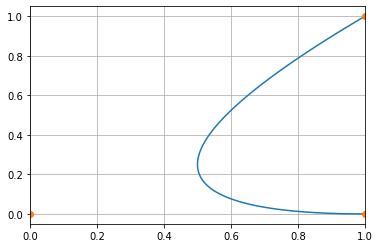

In [53]:
import numpy as np


def quadratic_bezier(p0, p1, p2, num_points=100):
    t = np.linspace(0, 1, num_points)
    x = (1 - t) ** 2 * p0[0] + 2 * (1 - t) * t * p1[0] + t ** 2 * p2[0]
    y = (1 - t) ** 2 * p0[1] + 2 * (1 - t) * t * p1[1] + t ** 2 * p2[1]
    return x, y


if __name__ == '__main__':
    import matplotlib.pyplot as plt

    B = quadratic_bezier((1, 1), (0, 0), (1, 0))
    plt.plot(*B)
    x, y = zip((1, 1), (0, 0), (1, 0))
    plt.plot(x, y, 'o')
    plt.xlim((0, 1))
    plt.grid()
    plt.show()

In [50]:
import pandas as pd
B = (B[0].astype('float32'), B[1].astype('float32'))
df = pd.DataFrame({'x':B[0].tolist(), 'y':B[0].tolist()})
df.to_csv("test_bezier_regression.csv")

In [45]:
len(B[0])

100

In [36]:
from bezier import quadratic_bezier

In [52]:
from bezier import quadratic_bezier

def test_bezier_regression(num_regression):
    x, y = quadratic_bezier((1, 1), (0, 0), (1, 0))
    num_regression.check({'x': x, 'y': y})

                                ~END~